# Data visualization <a name="chap:R_viz"></a>

<!--NAVIGATION-->

<[Back to Workshop Contents](Index.ipynb)>

<div id="toc"> </div>

This chapter introduces key principles of graphics, along with R packages and commands that will altogether allow you to build a workflow for effective data visualization for exploratory and publicatiion purposes. We will start with some basic plotting and data exploration. You will then learn to generate publication-quality visualizations using the `ggplot2` package. 

## Data exploration with basic plotting

Before you do any statistical analyses with data, you must clean, explore, and visualize it. And eventually, you want to produce a finished product that presents visualizations of your data and your results clearly and concisely. 

Ultimately, at both, the data exploration and the finished product stages, the goal of graphics is to present information such that it provides intuitive ideas. As Edward Tufte says:
> *"Graphical excellence is that which gives to the viewer the greatest number of ideas in the shortest time with the least ink in the smallest space."*

R can produce beautiful graphics without the time-consuming and fiddly methods that you might have used in Excel or equivalent. You should also make it a habit to quickly plot the data for exploratory analysis. So we are going to learn some basic plotting first.

### Basic plotting commands

Here is a menu of basic R plotting commands (use `?commandname` to learn more about it):

|    |  |
|:------------- |:------------- |
|`plot(x,y)`|        Scatterplot|
|`plot(y~x)`|       Scatterplot with `y` as a response variable|
|  `hist(mydata)`|     Histogram|
|`barplot(mydata)`|      Bar plot|
|`points(y1$\sim$x1)`|   Add another series of points|
|  `boxplot(y$\sim$x)`|    Boxplot|

> **R graphics devices**:
> In all that follows, you may often end up plotting multiple plots on the same graphics window without intending to do so, because R by default keeps plotting in the most recent plotting window that was opened. You can close a particular graphics window or “device” by using `dev.off()`, and all open devices/windows with `graphics.off()`. By default, `dev.off()` will close the most recent figure device that was opened.

>Note that there are invisible devices in `R`! For example, if you are printing to pdf (coming up below), the device or graphics window will not be visible on your computer screen.

Now let’s try some simple plotting for data exploration. As a case study, we will use a dataset on Consumer-Resource (e.g., Predator-Prey) body mass ratios taken from the Ecological Archives of the ESA (Barnes *et al.* 2008, Ecology 89:881).

<ul style="list-style-type:square">
  <li>Copy the file `EcolArchives-E089-51-D1.csv` from `Data` directory in the master git repository on bitbucket to your own `Data` directory.</li>
</ul>

Now, launch R and read in these data to a data frame (note the relative path):

In [1]:
MyDF <- read.csv("../data/EcolArchives-E089-51-D1.csv")
dim(MyDF) #check the size of the data frame you loaded

[1] 34931    15

Let's look at what the data contain. Type `MyDF` and hit the TAB key twice in the R commandline. If you are using RStudio, you just can hit it once, and you will get a list of column names.

**In RStudio, you will see a drop-down list of all the column headers when you hit TAB**

You can also use the `str()` and `head()` commands (See the Intro to R Chapter in [these notes](https://github.com/mhasoba/TheMulQuaBio/blob/master/silbiocomp/SilBioComp.pdf).

As you can see, these data contain predator-prey body size information. This is an interesting dataset because it is huge, and covers a wide range of body sizes of aquatic species involved in consumer-resource interactions — from unicells to whales. Analyzing this dataset should tell us a lot about what sizes of prey predators like to eat.

<img src="./graphics/SeaLion.png" alt="A consumer-resource (predator-prey) interaction waiting to happen" style="width: 500px;"/>

### Scatter Plots

Let's start by plotting Predator mass vs. Prey mass. 

First I will use the `repr` R package to change the default plot size in this jupyter notebook (you don't have to do this if you are using RStudio):

In [1]:
library(repr)
options(repr.plot.width=6, repr.plot.height=4) # Change default plot size; not necessary if you are using Rstudio

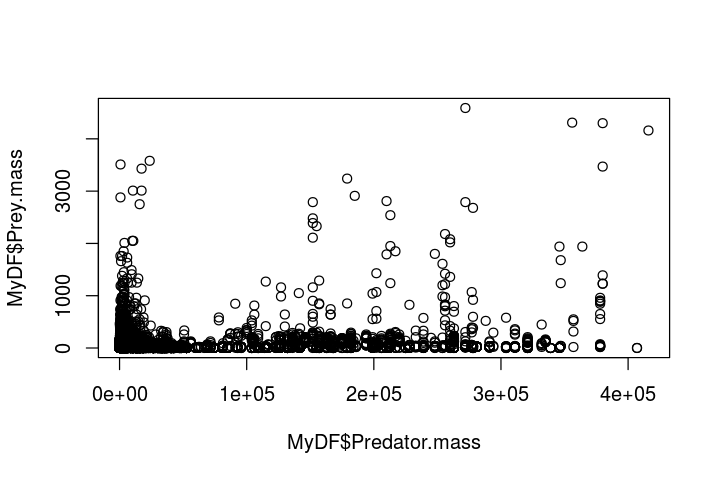

In [3]:
plot(MyDF$Predator.mass,MyDF$Prey.mass)

That doesn't look very meanigful! Let's try taking logarithms. Why? - Because body sizes across species tend to be log-normally distributed, with a lot of small species and a few large ones -- Taking a log allows you to inspect the body size range in a meaningful (logarithmic) scale and reveals the tru relationship. This also illustrates a importsnt point. Just like statistical analyses, the effectiveness of data visualization too depends on the type of distibution of the data. 

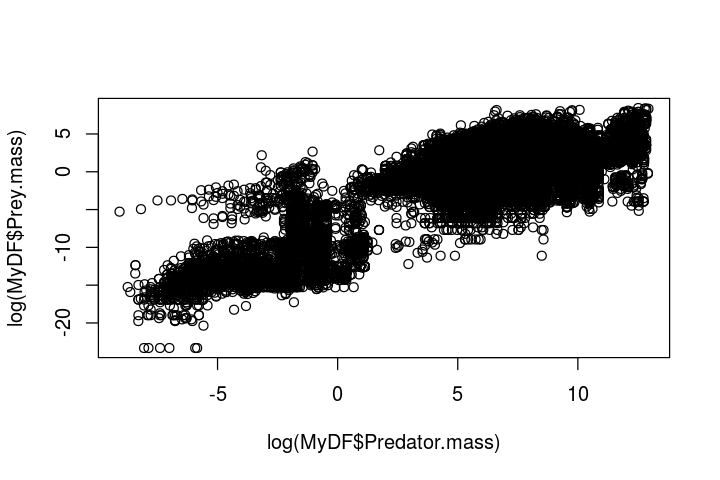

In [4]:
plot(log(MyDF$Predator.mass),log(MyDF$Prey.mass))

We can change almost any aspect of the resulting graph; let’s change the
symbols by specifying the <span>p</span>lot <span>ch</span>aracters
using <span>pch</span>:

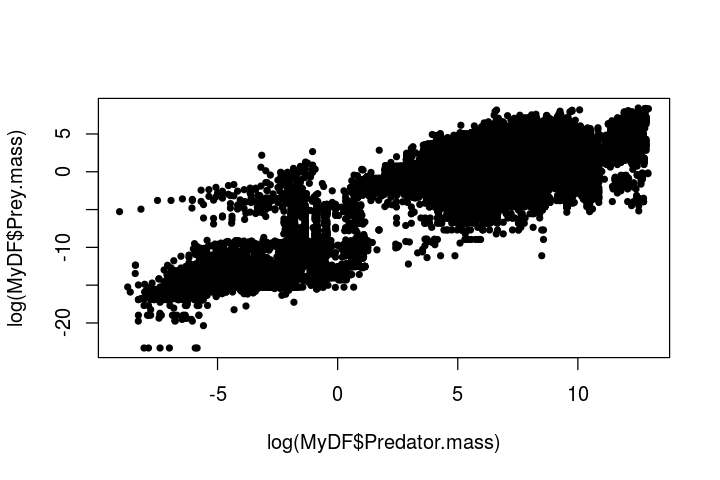

In [5]:
plot(log(MyDF$Predator.mass),log(MyDF$Prey.mass),pch=20) # Change marker

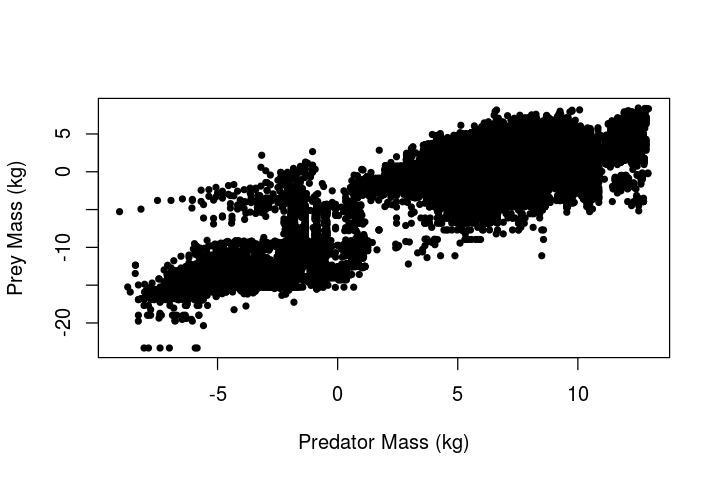

In [6]:
plot(log(MyDF$Predator.mass),log(MyDF$Prey.mass),pch=20, 
     xlab = "Predator Mass (kg)", ylab = "Prey Mass (kg)") # Add labels

A really great summary of basic R graphical parameters can be [found here](https://www.statmethods.net/advgraphs/parameters.html).

### Histograms

Why did we have to take a logarithm to see the relationship between
predator and prey size? Plotting histograms of the two classes
(predator, prey) should be insightful, as we can then see the “marginal”
distributions of the two variables.

Let’s first plot a histogram of predator body masses:

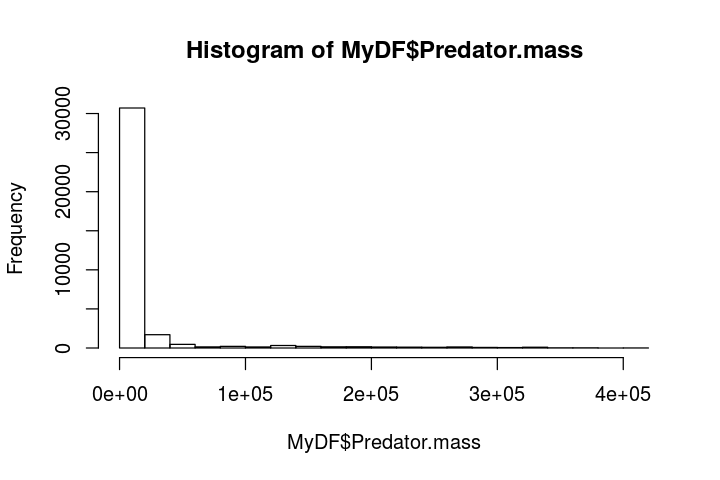

In [7]:
hist(MyDF$Predator.mass)

Clearly, the data are heavily right skewed, with small body sized organisms dominating (that’s a general pattern, as mentioned above). Let's now take a logarithm and see if we can get a better idea of what the distribution of predator sizes looks like:

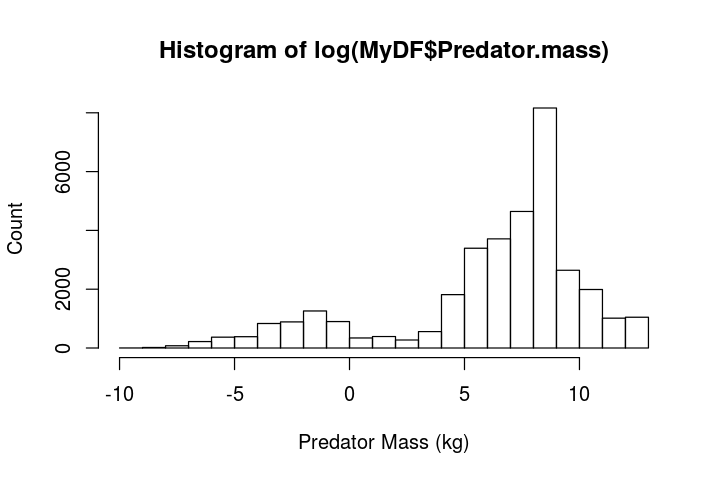

In [8]:
hist(log(MyDF$Predator.mass), 
   xlab = "Predator Mass (kg)", ylab = "Count") # include labels

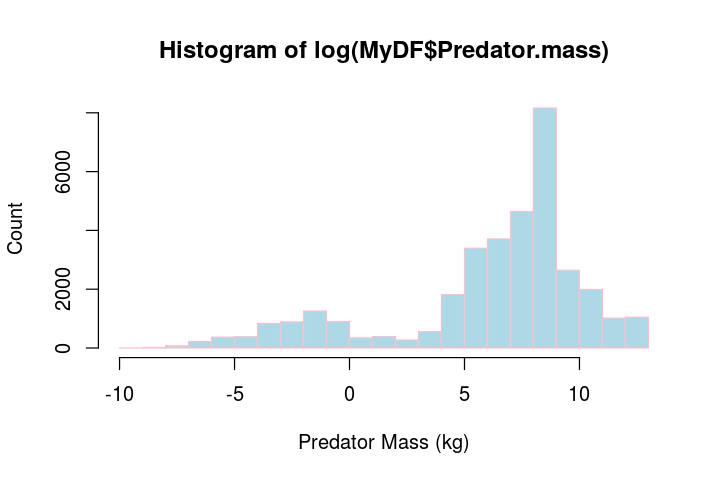

In [9]:
hist(log(MyDF$Predator.mass),xlab="Predator Mass (kg)",ylab="Count", 
    col = "lightblue", border = "pink") # Change bar and borders colors 

So, taking a log really makes clearer what the distribution of body predator sizes looks like. *Try the same with prey body masses.*

#### Exercise

We can do a lot of beautification and fine-tuning of your R plots! As an exercise, try adjusting the histogram bin widths to make them same for the predator and prey, and making the x and y labels larger and in boldface. To get started, look at the help documentation of `hist`.

### Subplots

We can also plot both predator and prey body masses in different sub-plots using `par` so that we can compare them visually.

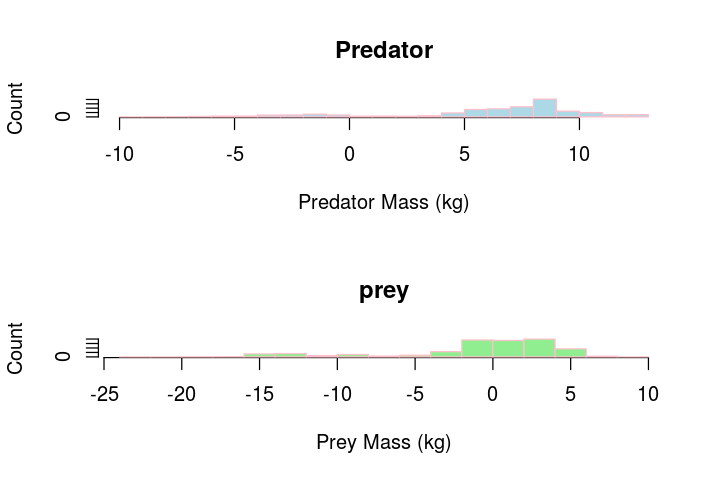

In [10]:
par(mfcol=c(2,1)) #initialize multi-paneled plot
par(mfg = c(1,1)) # specify which sub-plot to use first 
hist(log(MyDF$Predator.mass),
    xlab = "Predator Mass (kg)", ylab = "Count", 
    col = "lightblue", border = "pink", 
    main = 'Predator') # Add title
par(mfg = c(2,1)) # Second sub-plot
hist(log(MyDF$Prey.mass),
    xlab="Prey Mass (kg)",ylab="Count", 
    col = "lightgreen", border = "pink", 
    main = 'prey')

Another option for making multi-panel plots is the `layout` function.

### Overlaying plots

Better still, we would like to see if the predator mass and prey mass distributions are similar by overlaying them.

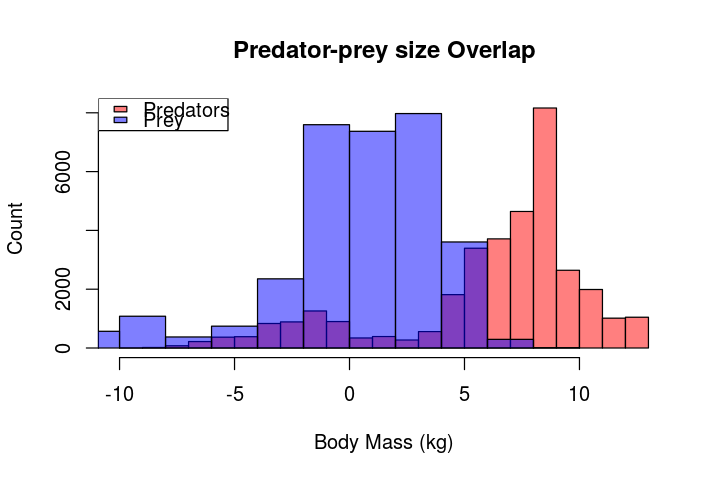

In [11]:
hist(log(MyDF$Predator.mass), # Predator histogram
    xlab="Body Mass (kg)", ylab="Count", 
    col = rgb(1, 0, 0, 0.5), # Note 'rgb', fourth value is transparency
    main = "Predator-prey size Overlap") 
hist(log(MyDF$Prey.mass), col = rgb(0, 0, 1, 0.5), add = T) # Plot prey
legend('topleft',c('Predators','Prey'),   # Add legend
    fill=c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5))) # Define legend colors

Plot annotation with text can be done with either single or double quotes, i.e., ‘Plot Title’ or “Plot Title”, respectively. But it is  generally a good idea to use double quotes because sometimes you would like to use an apostrophe in your title or axis label strings.

#### Exercise 

* It would be nicer to have both the plots with the same bin sizes – try to do it

### Boxplots

Now, let’s try plotting boxplots instead of histograms. These are useful for getting a visual summary of the distribution of your data.

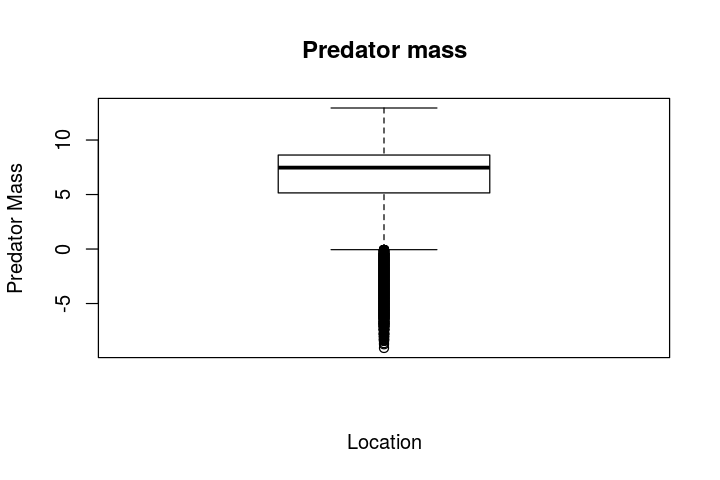

In [12]:
boxplot(log(MyDF$Predator.mass), xlab = "Location", ylab = "Predator Mass", main = "Predator mass")

Now let’s see how many locations the data are from:

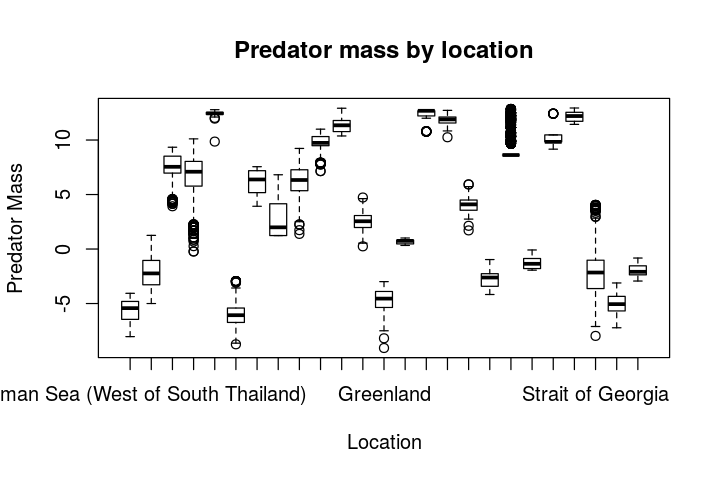

In [13]:
boxplot(log(MyDF$Predator.mass) ~ MyDF$Location, # Why the tilde?
    xlab = "Location", ylab = "Predator Mass",
    main = "Predator mass by location")

Note the tilde (\~). This is to tell R to subdivide or categorize your analysis and plot by the “Factor” location. More on this later.

That’s a lot of locations! You will need an appropriately wide plot to see all the boxplots adequately. Now let’s try boxplots by feeding interaction type:

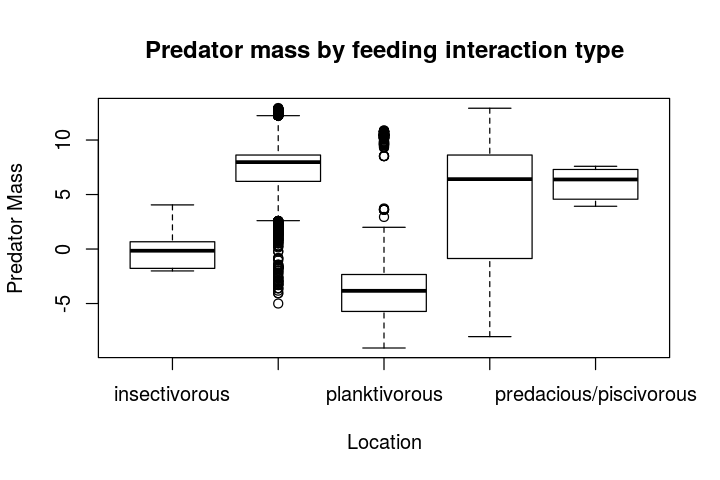

In [14]:
boxplot(log(MyDF$Predator.mass) ~ MyDF$Type.of.feeding.interaction,
    xlab = "Location", ylab = "Predator Mass",
    main = "Predator mass by feeding interaction type")

### Combining plot types

It would be nice to see both the predator and prey (marginal) distributions as well as the scatterplot for an exploratory analysis. We can do this by adding boxplots of the marginal variables to the scatterplot.

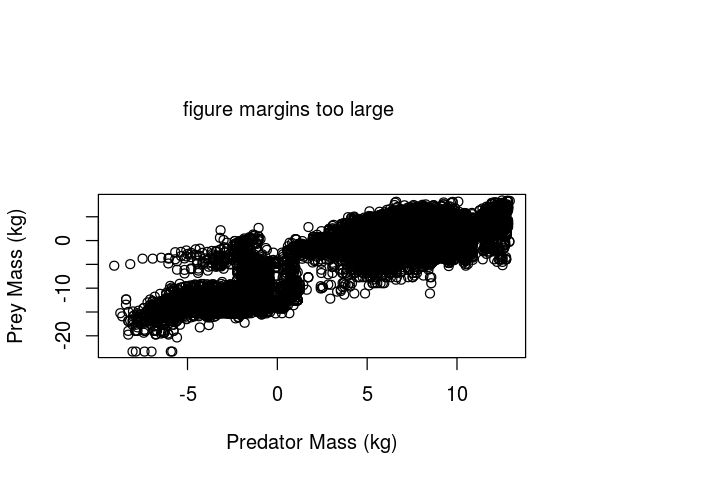

In [15]:
 par(fig=c(0,0.8,0,0.8)) # specify figure size as proportion
 plot(log(MyDF$Predator.mass),log(MyDF$Prey.mass),
    xlab = "Predator Mass (kg)", ylab = "Prey Mass (kg)") # Add labels
 par(fig=c(0,0.8,0.55,1), new=TRUE)
 boxplot(log(MyDF$Predator.mass), horizontal=TRUE, axes=FALSE)
 par(fig=c(0.65,1,0,0.8),new=TRUE)
 boxplot(log(MyDF$Prey.mass), axes=FALSE)
 mtext("Fancy Predator-prey scatterplot", side=3, outer=TRUE, line=-3)

To understand this plotting method, think of the full graph area as going from (0,0) in the lower left corner to (1,1) in the upper right corner. The format of the `fig=` parameter is a numerical vector of the form `c(x1, x2, y1, y2)`. The first `fig= ` sets up the scatterplot going from 0 to 0.8 on the x axis and 0 to 0.8 on the y axis. The top boxplot goes from 0 to 0.8 on the x axis and 0.55 to 1 on the y axis. The right hand boxplot goes from 0.65 to 1 on the x axis and 0 to 0.8 on the y axis. You can experiment with these proportions to change the spacings between plots.

### Lattice plots

You can also make lattice graphs to avoid the somewhat laborious `par()` approach above of getting multi-panel plots. For this, you will need to load a library that isn't included by default when you run R:

In [16]:
library(lattice)

Let's make a lattice plot of body massby densities (distributions) by type of feeding interaction:

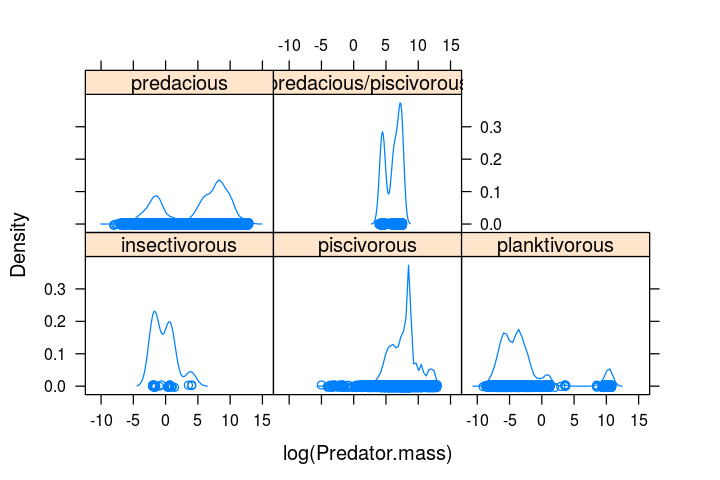

In [17]:
densityplot(~log(Predator.mass) | Type.of.feeding.interaction, data=MyDF)

Look up [this page](http://www.statmethods.net/advgraphs/trellis.html) and the `lattice` package help for more info.

### Saving your graphics

And you can also save the figure in a vector graphics format like a pdf. It is important to learn to do this, because you want to be able to save your plots in good resolution, and want to avoid the manual steps of
clicking on the figure, doing “save as”, etc. So let’s save the figure as a PDF:

In [18]:
pdf("../Results/Pred_Prey_Overlay.pdf", # Open blank pdf page using a relative path
    11.7, 8.3) # These numbers are page dimensions in inches
hist(log(MyDF$Predator.mass), # Plot predator histogram (note 'rgb')
    xlab="Body Mass (kg)", ylab="Count", col = rgb(1, 0, 0, 0.5), main = "Predator-Prey Size Overlap") 
hist(log(MyDF$Prey.mass), # Plot prey weights
    col = rgb(0, 0, 1, 0.5), 
    add = T)  # Add to same plot = TRUE
legend('topleft',c('Predators','Prey'), # Add legend
    fill=c(rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5))) 
graphics.off(); #you can also use dev.off() 

ERROR: Error in pdf("../Results/Pred_Prey_Overlay.pdf", 11.7, 8.3): cannot open file '../Results/Pred_Prey_Overlay.pdf'


Always try to save results in a vector format, which can be scaled up to any size. For more on vector vs raster images/graphics, [see this](https://en.wikipedia.org/wiki/Vector_graphics).

Note that you are saving to the `Results` directory now. This is a recommended project organization and workflow: store and retrieve data from a `
Data` directory, keep your code and work from a `Code` directory, and save outputs to a `Results` directory.

You can also try other graphic output formats. For example, `png()` (a raster format) instead of `pdf()`. As always, look at the help documentation of each of these commands!

### Practicals

In this practical, you will write script that draws and saves three lattice graphs by feeding interaction type: one of predator mass, one of prey mass and one of the size ratio of prey mass over predator mass. Note that you would want to use logarithms of masses (or mass-ratios)for all three plots. In addition, the script will calculate the mean and median predator mass, prey mass and predator-prey size-ratios to a csv file. So:

* Write a script file called `PP_Lattice.R` and save it in the `Code` directory — sourcing or running this script should result in three files called `Pred_Lattice.pdf`, ` Prey_Lattice.pdf`, and `SizeRatio_Lattice.pdf` being
saved in the `Results` directory (the names should be self-explanatory).

In addition, the script should calculate the mean and median log predator mass, prey mass, and predator-prey size ratio, *by feeding type*, and save it as a single csv output table called `PP_Results.csv` to the `Results` directory. The able should have appropriate headers (e.g., Feeding type, mean, mdian). (Hint: you will have to initialize a new dataframe or matrix in the script to first store the calculations)

The script should be self-sufficient and not need any external inputs — it should import the above predator-prey dataset from the appropriate directory, and save the graphic plots to the appropriate directory (Hint: use relative paths!).

There are multiple ways to do this practical. The plotting and saving component is simple enough. For calculating the statistics by feeding type, you can either use the “loopy” way — first obtaining a list of feeding types (look up the `unique` or `levels` functions) and then loop over them, using `subset` to extract the dataset by feeding type at each iteration, or the R-savvy way, by using `tapply` or `ddply` and avoiding looping altogether see the advanced R Chapter in [these notes](https://github.com/mhasoba/TheMulQuaBio/blob/master/silbiocomp/SilBioComp.pdf).

## High-quality graphics in R

`R` can produce beautiful graphics/visualizations, but it typically takes a lot of work to obtain the desired result. This is because the starting point is pretty much a “bare” plot, and adding features commonly required for publication-grade figures (legends, statistics, regressions, sub-plotting etc.) can require a lot of small and painful additional arguments to the plotting commands *at the same time*, or even additional steps (such as the [fancy predator-prey scatterplot](#Combining-plot-types) above).

Moreover, it is very difficult to switch from one representation of the data to another (i.e., from boxplots to scatterplots), or to plot several datasets together. The `R` package `ggplot2` overcomes these issues, and produces truly high-quality, publication-ready graphics suitable for papers, theses and reports.

> **Tip:** *Currently, `ggplot2` cannot be used to create 3D graphs or mosaic plots. In any case, most of you won’t be needing 3D plots. If you do, there are many ways to do 3D plots using other plotting packages in R. In particular, look up the `scatterplot3d` and `plot3D` packages.*

`ggplot2` differs from other approaches as it attempts to provide a “grammar” for graphics in which each layer is the equivalent of a verb, subject etc. and a plot is the equivalent of a sentence. All graphs start with a layer showing the data, other layers and attributes/styles are added to modify the plot. Specifically, according to this grammar, a statistical graphic is a “mapping” from data to aesthetic attributes (colour, shape, size; set using `aes`) of geometric objects (points, lines, bars; set using `geom`).

For more on the ideas underlying ggplot, see the book “ggplot2: Elegant Graphics for Data Analysis”, by H. Wickham (in your Reading directory). Also, the [ggplot2 website](http://ggplot2.tidyverse.org/) is an excellent resource.

`ggplot2` should be available on your computer. If not, look up the section on installing packages in the Intro to R Chapter in [these notes](https://github.com/mhasoba/TheMulQuaBio/blob/master/silbiocomp/SilBioComp.pdf).

ggplot can be used in two ways: with `qplot` (for `q`uick ` plot`ting) and `ggplot` for fully customized plotting.

*Note that `ggplot2` only accepts data in data frames.*

### Basic plotting with `qplot`

`qplot` can be used to quickly produce graphics for exploratory data analysis, and as a base for more complex graphics. It uses syntax that is closer to the standard R plotting commands.

We will use the same predator-prey body size dataset again – you will soon see how much nice the same types of plots you made above look when done with ggplot!

First, load the package:

In [ ]:
require(ggplot2)  ## Load the package

#### Scatterplots

Let’s start plotting the `Predator.mass` vs `Prey.mass`:

In [ ]:
qplot(Prey.mass, Predator.mass, data = MyDF)

As before, let’s take logarithms and plot:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF)

Now, color the points according to the type of feeding interaction:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, colour = Type.of.feeding.interaction)

The same as above, but changing the shape:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, shape = Type.of.feeding.interaction)

#### Aesthetic mappings

These examples demonstrate a key difference between `qplot` and the standard `plot` command: When you want to assign colours, sizes or shapes to the points on your plot, using the `plot` command, it's your responsibility to convert (i.e., “map”) a categorical variable in your data (e.g., type of feeding interaction in the above case) onto colors (or shapes) that `plot` knows how to use (e.g., by specifying “red”, “blue”, “green”, etc).

ggplot does this mapping for you automatically, and also provides a legend! This makes it really easy to quickly include additional data (e.g., if a new feeding interaction type was added to the data) on the plot.

Instead of using ggplot’s automatic mapping, if you want to manually set a color or a shape, you have to use `I()` (meaning “Identity”). To see this in practice, try the following:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), 
    data = MyDF, colour = "red")

You chose red, but ggplot used mapping to convert it to a particular
shade of red. To set it manually to the real red, do this:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, colour = I("red"))

Similarly, for point size, compare these two:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, size = 3) #with ggplot size mapping

In [ ]:
qplot(log(Prey.mass), log(Predator.mass),  data = MyDF, size = I(3)) #no mapping

But for shape, ggplot doesn’t have a continuous mapping because shapes are a discrete variable. To see this, compare these two:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, shape = 3) #will give error

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, shape= I(3))

#### Setting transparency

Because there are so many points, we can make them semi-transparent using `alpha` so that the overlaps can be seen:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, colour = Type.of.feeding.interaction, alpha = I(.5))

Here, try using `alpha = .5` instead of `alpha = I(.5)` and see what happens.

#### Adding smoothers and regression lines

Now add a smoother to the points:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, geom = c("point", "smooth"))

If we want to have a linear regression, we need to specify the method as
being <span>lm</span>:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, geom = c("point", "smooth")) + geom_smooth(method = "lm")

`lm` stands for `l`inear `m`odels (linear regression is a type of linear model). 

We can also add a “smoother” for each type of interaction:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, geom = c("point", "smooth"), 
      colour = Type.of.feeding.interaction) + geom_smooth(method = "lm")

To extend the lines to the full range, use `fullrange = TRUE`:

In [ ]:
qplot(log(Prey.mass), log(Predator.mass), data = MyDF, geom = c("point", "smooth"),
      colour = Type.of.feeding.interaction) + geom_smooth(method = "lm",fullrange = TRUE)

Now let's see how the ratio between prey and predator mass changes according to the type of interaction:

In [ ]:
qplot(Type.of.feeding.interaction, log(Prey.mass/Predator.mass), data = MyDF)

Because there are so many points, we can “jitter” them to get a better
idea of the spread:

In [ ]:
qplot(Type.of.feeding.interaction, log(Prey.mass/Predator.mass), data = MyDF, geom = "jitter")

#### Boxplots

Or we can draw a boxplot of the data (note the `geom` argument, which stands for `geom`etry):

In [ ]:
qplot(Type.of.feeding.interaction, log(Prey.mass/Predator.mass), data = MyDF, geom = "boxplot")

#### Histograms and density plots

Now let’s draw an histogram of predator-prey mass ratios:

In [ ]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "histogram")

Color the histogram according to the interaction type:

In [ ]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "histogram", 
      fill = Type.of.feeding.interaction)

You may want to define binwidth (in units of x axis):

In [ ]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "histogram", 
      fill = Type.of.feeding.interaction, binwidth = 1)

To make it easier to read, we can plot the smoothed density of the data:

In [ ]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "density", 
      fill = Type.of.feeding.interaction)

And you can make the densities transparent so that the overlaps are visible:

In [ ]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "density", 
      fill = Type.of.feeding.interaction, 
      alpha = I(0.5))

or using `colour` instead of `fill` draws only the edge of the curve:

In [ ]:
qplot(log(Prey.mass/Predator.mass), data = MyDF, geom =  "density", 
      colour = Type.of.feeding.interaction)

Similarly, `geom = “bar”` produces a barplot, `geom = “line”` a series of points joined by a line, etc.

#### Multi-faceted plots

An alternative way of displaying data belonging to different classes is using “faceting”. We did this using ` lattice()` previously, but ggplot does a much nicer job:

In [ ]:
qplot(log(Prey.mass/Predator.mass), facets = Type.of.feeding.interaction ~., data = MyDF, geom =  "density")

The `\~.` (the space is not important) notation tells ggplot whether to do the faceting by row or by column. So if you want a by-column configuration, switch `\~` and `.`, and also swap the position of the `.\~`:

In [ ]:
qplot(log(Prey.mass/Predator.mass), facets =  .~ Type.of.feeding.interaction, data = MyDF, geom =  "density")

You can also facet by a combination of categories (this is going to be a big plot!):

In [ ]:
qplot(log(Prey.mass/Predator.mass), facets = .~ Type.of.feeding.interaction + Location, 
      data = MyDF, geom =  "density")

And you can also change the order of the combination:

In [ ]:
qplot(log(Prey.mass/Predator.mass), facets = .~ Location + Type.of.feeding.interaction, 
    data = MyDF, geom =  "density")

For more fine-tuned faceting, look up the `facet_grid()` and `facet_wrap()` functions within `ggplot2`. Look up this section of the  [R Cookbook](http://www.cookbook-r.com/Graphs/Facets_(ggplot2)) for more examples.

#### Logarithmic axes

A better way to plot data in the log scale is to also set the axes to be logarithmic:

In [ ]:
qplot(Prey.mass, Predator.mass, data = MyDF, log="xy")

#### Plot annotations

Let’s add a title and labels:

In [ ]:
qplot(Prey.mass, Predator.mass, data = MyDF, log="xy",
    main = "Relation between predator and prey mass", 
    xlab = "log(Prey mass) (g)", 
    ylab = "log(Predator mass) (g)")

Adding `+ theme_bw()` makes it suitable for black and white printing.

In [ ]:
qplot(Prey.mass, Predator.mass, data = MyDF, log="xy",
    main = "Relation between predator and prey mass", 
    xlab = "Prey mass (g)", 
    ylab = "Predator mass (g)") + theme_bw()

#### Saving your plots

Finally, let’s save a pdf file of the figure (same approach as we [used before](#Saving-your-graphics)):

In [ ]:
pdf("../Results/MyFirst-ggplot2-Figure.pdf")
print(qplot(Prey.mass, Predator.mass, data = MyDF,log="xy",
    main = "Relation between predator and prey mass", 
    xlab = "log(Prey mass) (g)", 
    ylab = "log(Predator mass) (g)") + theme_bw())
dev.off()

Using `print` ensures that the whole command is kept together and that you can use the command in a script.

### Some more important ggplot options

Other important options to keep in mind:

|               |                |
|:------------- |:------------- |
|`xlim`      | limits for x axis: `xlim = c(0,12)`|
|`ylim`      | limits for y axis|
|`log`       |log transform variable `log = “x”`, `log = “y”`, `log = “xy”`|
|`main`      |title of the plot `main = “My Graph”`|
|`xlab`      |x-axis label|
|`ylab`      |y-axis label|
|`asp`       | aspect ratio `asp = 2`, `asp = 0.5`|
|`margins`   |whether or not margins will be displayed|


### Various `geom`

`geom` Specifies the geometric objects that define the graph type. The geom option is expressed as a R character vector with one or more entries. geom values include “point”, “smooth”, “boxplot”, “line”, “histogram”, “density”, “bar”, and “jitter”.

Try the following:

### Advanced plotting: `ggplot`

The command `qplot` allows you to use only a single dataset and a single set of “aesthetics” (x, y, etc.). To make full use of `ggplot2`, we need to use the command `ggplot`, which allows you to use “layering”. Layering is the mechanism by which additional data elements are added to a plot. Each layer can come from a different dataset and have a different aesthetic mapping, allowing us to create plots that could not be generated using `qplot()`, which permits only a single dataset and a single set of aesthetic mappings.

For a `ggplot` plotting command, we need at least:

-   The data to be plotted, in a data frame;

-   Aesthetics mappings, specifying which variables we want to plot, and how;

-   The `geom`, defining the geometry for representing the data;

-   (Optionally) some `stat` that transforms the data or performs statistics using the data.

To start a graph, we must specify the data and the aesthetics:

In [ ]:
p <- ggplot(MyDF, aes(x = log(Predator.mass),
                y = log(Prey.mass),
                colour = Type.of.feeding.interaction ))

Here we have created a graphics object <span>p</span> to which we can add layers and other plot elements.

Now try to plot the graph:

In [ ]:
p

PLot is blank because we are yet to specify a geometry — only then can we see the graph:

In [ ]:
p + geom_point()

We can use the “+” sign to concatenate different commands:

In [ ]:
p <- ggplot(MyDF, aes(x = log(Predator.mass), y = log(Prey.mass), colour = Type.of.feeding.interaction ))
q <- p + geom_point(size=I(2), shape=I(10)) + theme_bw()
q

Let’s remove the legend:

In [ ]:
q + theme(legend.position = "none")

### Some useful ggplot examples 


### Plotting a matrix

Let's will plot the values of a matrix. This is basically same as rendering a 2D image. We will visualize random values taken from a unform distribution $\mathcal U [0,1]$. Because we want to plot a matrix, and ggplot2 accepts only dataframes, we use the package reshape2, which can “melt” a matrix into a dataframe:

In [ ]:
require(reshape2)

In [ ]:
GenerateMatrix <- function(N){
    M <- matrix(runif(N * N), N, N)
    return(M)
}

In [ ]:
M <- GenerateMatrix(10)
Melt <- melt(M)

In [ ]:
ggplot(Melt, aes(Var1, Var2, fill = value)) + geom_tile()

Add a black line dividing cells:

In [ ]:
p + geom_tile(colour = "black")

Remove the legend:

In [ ]:
p + theme(legend.position = "none")

Remove all the rest:

In [ ]:
p + theme(legend.position = "none", 
     panel.background = element_blank(),
     axis.ticks = element_blank(), 
     panel.grid.major = element_blank(),
     panel.grid.minor = element_blank(),
     axis.text.x = element_blank(),
     axis.title.x = element_blank(),
     axis.text.y = element_blank(),
     axis.title.y = element_blank())

Explore some colors:

In [ ]:
p + scale_fill_continuous(low = "yellow", high = "darkgreen")

In [ ]:
p + scale_fill_gradient2()

In [ ]:
p + scale_fill_gradientn(colours = grey.colors(10))

In [ ]:
p + scale_fill_gradientn(colours = rainbow(10))

In [ ]:
p + scale_fill_gradientn(colours = c("red", "white", "blue"))

### Plotting two dataframes (Girko's circular Law)

According to Girko's circular law, the eigenvalues of a matrix $M$ of size $N \times N$ are approximately contained in a circle in the complex plane with radius $\sqrt{N}$. Let's draw the results of a simulation displaying this result.

First, we need to build a function object that will calculate the ellipse (the perdicted bounds of the eigenvalues): 

In [ ]:
build_ellipse <- function(hradius, vradius){ # function that returns an ellipse
  npoints = 250
  a <- seq(0, 2 * pi, length = npoints + 1)
  x <- hradius * cos(a)
  y <- vradius * sin(a)  
  return(data.frame(x = x, y = y))
}

In [ ]:
N <- 250 # Assign size of the matrix

M <- matrix(rnorm(N * N), N, N) # Build the matrix

eigvals <- eigen(M)$values # Find the eigenvalues

eigDF <- data.frame("Real" = Re(eigvals), "Imaginary" = Im(eigvals)) # Build a dataframe

my_radius <- sqrt(N) # The radius of the circle is sqrt(N)

ellDF <- build_ellipse(my_radius, my_radius) # Dataframe to plot the ellipse

names(ellDF) <- c("Real", "Imaginary") # rename the columns

Now the plotting:

In [ ]:
# plot the eigenvalues
p <- ggplot(eigDF, aes(x = Real, y = Imaginary))
p <- p +
  geom_point(shape = I(3)) +
  theme(legend.position = "none")

# now add the vertical and horizontal line
p <- p + geom_hline(aes(yintercept = 0))
p <- p + geom_vline(aes(xintercept = 0))

# finally, add the ellipse
p <- p + geom_polygon(data = ellDF, aes(x = Real, y = Imaginary, alpha = 1/20, fill = "red"))
p

#### Exercise

Create a self-sufficient R Script called `Girko.R` that combines all the above commands for plotting the Girko's law simulation, including saving the result figure as a file called `Girko.pdf` in the results directory.

### Annotating plots

In this example, we will use the ggplot `geom` `text` to annotate a plot.

In [ ]:
a <- read.table("Practicals/Data/Results.txt", header = TRUE)

Check what the data look like:

In [ ]:
head(a)

In [ ]:
a$ymin <- rep(0, dim(a)[1]) # append a column of zeros

# Print the first linerange
p <- ggplot(a)
p <- p + geom_linerange(data = a, aes(
                          x = x,
                          ymin = ymin,
                          ymax = y1,
                          size = (0.5)
                          ),
                        colour = "#E69F00",
                        alpha = 1/2, show.legend = FALSE)

# Print the second linerange
p <- p + geom_linerange(data = a, aes(
                          x = x,
                          ymin = ymin,
                          ymax = y2,
                          size = (0.5)
                          ),
                        colour = "#56B4E9",
                        alpha = 1/2, show.legend = FALSE)

# Print the third linerange:
p <- p + geom_linerange(data = a, aes(
                          x = x,
                          ymin = ymin,
                          ymax = y3,
                          size = (0.5)
                          ),
                        colour = "#D55E00",
                        alpha = 1/2, show.legend = FALSE)

# Annotate the plot with labels:
p <- p + geom_text(data = a, aes(x = x, y = -500, label = Label))

# now set the axis labels, remove the legend, and prepare for bw printing
p <- p + scale_x_continuous("My x axis",
                            breaks = seq(3, 5, by = 0.05)) + 
                            scale_y_continuous("My y axis") + 
                            theme_bw() + 
                            theme(legend.position = "none") 
p

#### Exercise

Create a self-sufficient R Script called `MyBars.pdf` that combines all the above commands for annotating a plot, including saving the result figure as a file called `MyBars.pdf` in the results directory.

### Mathematical display

Let's try mathematical annotation on a axis, and in the plot area.

First create some linear regression "data":

In [ ]:
x <- seq(0, 100, by = 0.1)
y <- -4. + 0.25 * x +
  rnorm(length(x), mean = 0., sd = 2.5)

# and put them in a dataframe
my_data <- data.frame(x = x, y = y)

# perform a linear regression
my_lm <- summary(lm(y ~ x, data = my_data))

# plot the data
p <-  ggplot(my_data, aes(x = x, y = y,
                          colour = abs(my_lm$residual))
             ) +
  geom_point() +
  scale_colour_gradient(low = "black", high = "red") +
  theme(legend.position = "none") +
  scale_x_continuous(
    expression(alpha^2 * pi / beta * sqrt(Theta)))

# add the regression line
p <- p + geom_abline(
  intercept = my_lm$coefficients[1][1],
  slope = my_lm$coefficients[2][1],
  colour = "red")
# throw some math on the plot
p <- p + geom_text(aes(x = 60, y = 0,
                       label = "sqrt(alpha) * 2* pi"), 
                       parse = TRUE, size = 6, 
                       colour = "blue")

p

#### Exercise 

Create a self-sufficient R Script called `plotLin.R` that combines all the above commands for annotating a plot, including saving the resulting figure as a file called `MyLinReg.pdf` in the results directory.

### ggthemes

The package `ggthemes` provides you some additional `geom`s, ` scale`s, and `theme`s for `ggplot`. These include a theme based on Tufte's *The Visual Display of Quantitative Information* (see [suggested readings](#Readings)). 

Let's try this package. First install it:

In [ ]:
install.packages("ggthemes")

Then try:

In [ ]:
library(ggthemes)

p <- ggplot(MyDF, aes(x = log(Predator.mass), y = log(Prey.mass),
                colour = Type.of.feeding.interaction )) +
                geom_point(size=I(2), shape=I(10)) + theme_bw()

p + geom_rangeframe() + # now fine tune the geom to Tufte's range frame
        theme_tufte() # and theme to Tufte's minimal ink theme    

Go to <https://github.com/jrnold/ggthemes> for more information and a list of `geom`s, `theme`s, and `scale`s.

> **Tip:** *Both `library()` and `require()` are commands/functions to load packages. The difference is that `require()` is designed for use inside other functions, so it returns `FALSE` and gives a warning, whereas`library()` returns an error by default if the package does not exist.*

### Practicals

In this practical, you will write script that draws and saves a pdf file of the following figure, and writes the accompanying regression results to a formatted table in csv. Note that as the plot suggests, that the analysis must be subsetted by the `Predator.lifestage` field of the dataset. 

![Write a script that generates this figure](./graphics/Figure1.png)

**Guidelines**:

* Write a `R` script file called `PP_Regress.R` and save it in the `Code` directory. Sourcing or running this
script should result in one pdf file containing the following figure being saved in the `Results` directory: (Hint: Use the `print()` command to write to the pdf)

* In addition, the script should calculate the regression results corresponding to the lines fitted in the figure and save it to a csv delimited table called (`PP_Regress_Results.csv`), in the `Results` directory. (Hint: you will have to initialize a new dataframe in the script to first store the calculations and then `write.csv()` or `write.table()` it.)

* All that you are being asked for here is results of an analysis of Linear regression on subsets of the data corresponding to available Feeding Type $\times$ Predator life Stage combination — not a multivariate linear model with these two as separate covariates!

* The regression results should include the following with appropriate headers (e.g., slope, intercept, etc, in each Feeding type $\times$ life stage category): regression slope, regression intercept, R$^2$, F-statistic value, and p-value of the overall regression (Hint: Review the Stats week!).

* The script should be self-sufficient and not need any external inputs — it should import the above predator-prey dataset from the appropriate directory, and save the graphic plots to the appropriate directory (Hint: use relative paths). Anybody should be able to `source` it without errors.

* You can also use the `dplyr` function instead of looping (see advanced R Chapter in [these notes](https://github.com/mhasoba/TheMulQuaBio/blob/master/silbiocomp/SilBioComp.pdf)), and the `ggplot` command instead of `qplot`.

**Extra Credit**: 

Do the same as above, but the analysis this time should be separate by the dataset’s `Location`
field. Call it `PP_Regress_loc.R`. No need to generate plots for this (just the analysis results to a `.csv` file), as a combination of `Type.of.feeding.interaction`, `Predator.lifestage`, and ` Location` will be far too busy (faceting by three variables is too much to be meaningful)!

## Readings and Resources

Check out `Visualization` and `R` under [Readings](../readings) on this course's repository.

* Rolandi et al. “A Brief Guide to Designing Effective Figures for the Scientific Paper”, doi:10.1002/adma.201102518

* The classic [Tufte](www.edwardtufte.com/tufte/books_vdqi); Available in the Central Library, and I have also added extracts and a related book in pdf on the master repository. BTW, check out what Tufte thinks of [PowerPoint](https://www.edwardtufte.com/tufte/powerpoint).

* Lauren et al. “Graphs, Tables, and Figures in Scientific Publications: The Good, the Bad, and How Not to Be the Latter”, doi:10.1016/j.jhsa.2011.12.041

* [Effective scientific illustrations](www.labtimes.org/labtimes/issues/lt2008/lt05/lt\_2008\_05\_52\_53.pdf)

* [AddictedToR](https://web.archive.org/web/20120310121708/http://addictedtor.free.fr/graphiques/thumbs.php)